## Atividade 6 | Séries Temporais

Com a série temporal recebida, estruturar dois modelos de série temporal (com as abordagens que foram estudadas no módulo) e comparar eles através de alguma métrica, avaliando qual tem a melhor performance.

Após selecionar o melhor modelo, fazer uma previsão um passo a frente com ele e retornar o resultado.

## Preparando dados

In [1]:
#setup
!pip install statsmodels --upgrade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

<Axes: >

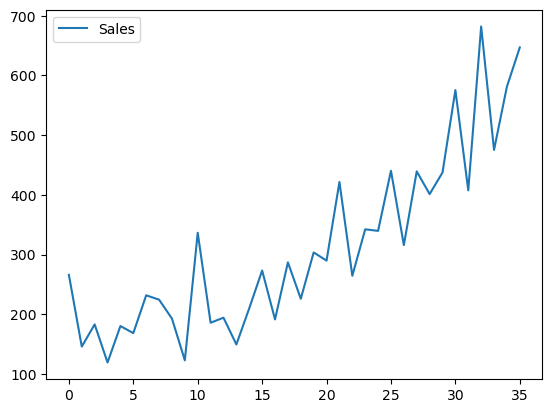

In [2]:
#carregando os dados
df = pd.read_csv('shampoo.csv')
df.plot()

In [3]:
# convertendo a coluna 'Month' para datetime
df['Month'] = df['Month'].apply(lambda x: '0' + x if len(x.split('-')[0]) == 1 else x)
df['Month'] = pd.to_datetime(df['Month'], format='%y-%m')

In [4]:
#reordenando colunas
df = df.reindex(columns=['Sales', 'Month'])

#renomeando colunas
df = df.rename(columns={'Sales': 'y', 'Month': 'ds'})
    
#convertendoco coluna y pra array NumPy
df['y'] = np.array(df['y'])

df.head(10)

,y,ds
0,266.0,2001-01-01
1,145.9,2001-02-01
2,183.1,2001-03-01
3,119.3,2001-04-01
4,180.3,2001-05-01
5,168.5,2001-06-01
6,231.8,2001-07-01
7,224.5,2001-08-01
8,192.8,2001-09-01
9,122.9,2001-10-01


In [5]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

## Modelo AR

In [6]:
def AR_model_generation(ts, p):
    model = ARIMA(ts, order = [p, 0, 0])
    model_fit = model.fit()
    return model_fit

In [7]:
#AR1
AR_1 = AR_model_generation(df.y, 1)
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -218.079
Date:                Mon, 24 Apr 2023   AIC                            442.157
Time:                        13:30:18   BIC                            446.908
Sample:                             0   HQIC                           443.815
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.2374     78.267      4.258      0.000     179.838     486.637
ar.L1          0.7509      0.128      5.872      0.000       0.500       1.002
sigma2      1.045e+04   2789.298      3.747      0.000    4985.064    1.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.54   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.01   Prob(JB):                         0.28
Heteroskedasticity (H):               2.16   Skew:                             0.65
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

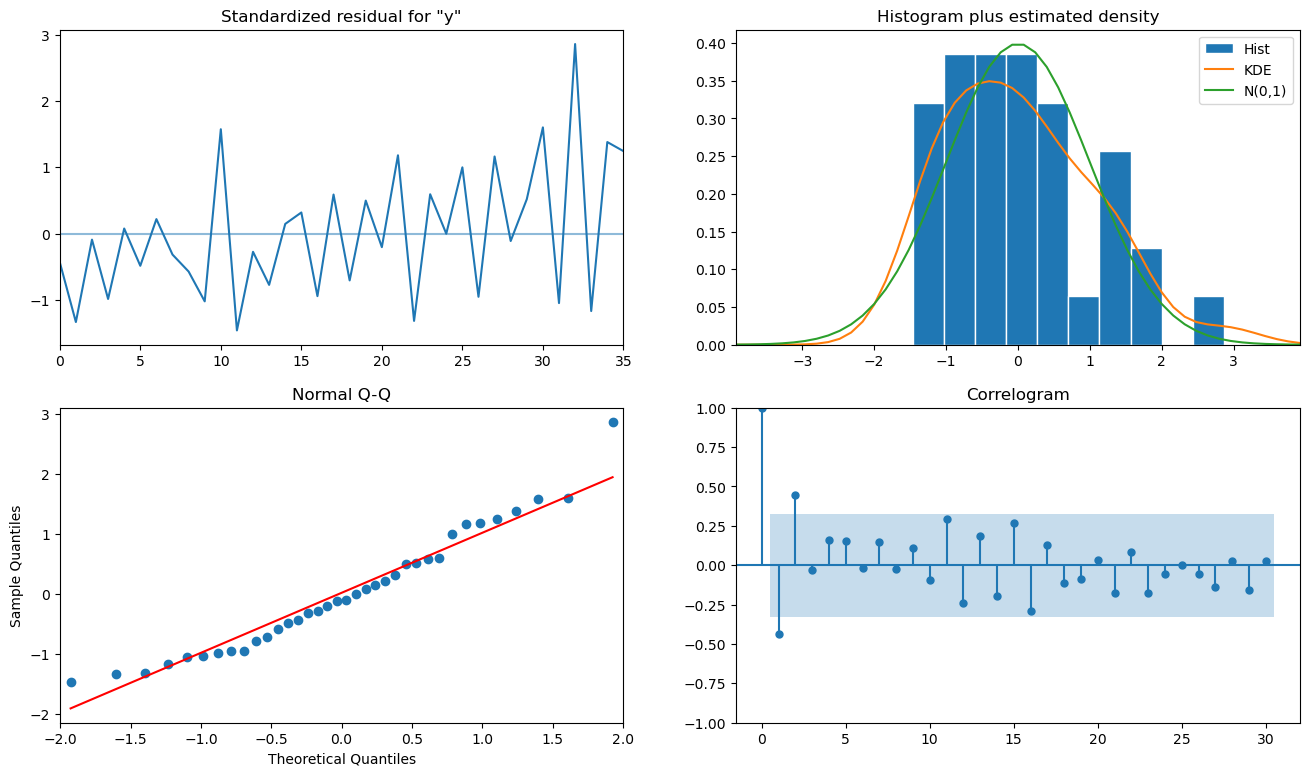

In [8]:
#analisando resíduos do modelo AR1
fig = plt.figure(figsize=(16,9))
fig = AR_1.plot_diagnostics(fig=fig, lags=30)

In [9]:
#AR2
AR_2 = AR_model_generation(df.y, 2)
AR_2.summary()

C:\Users\princ\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -207.732
Date:                Mon, 24 Apr 2023   AIC                            423.465
Time:                        13:30:19   BIC                            429.799
Sample:                             0   HQIC                           425.676
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.0560    202.004      1.876      0.061     -16.865     774.977
ar.L1          0.2617      0.134      1.953      0.051      -0.001       0.524
ar.L2          0.6858      0.146      4.683      0.000       0.399       0.973
sigma2      5622.9702   1605.243      3.503      0.000    2476.751    8769.189
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.40   Prob(JB):                         0.37
Heteroskedasticity (H):               1.74   Skew:                             0.52
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

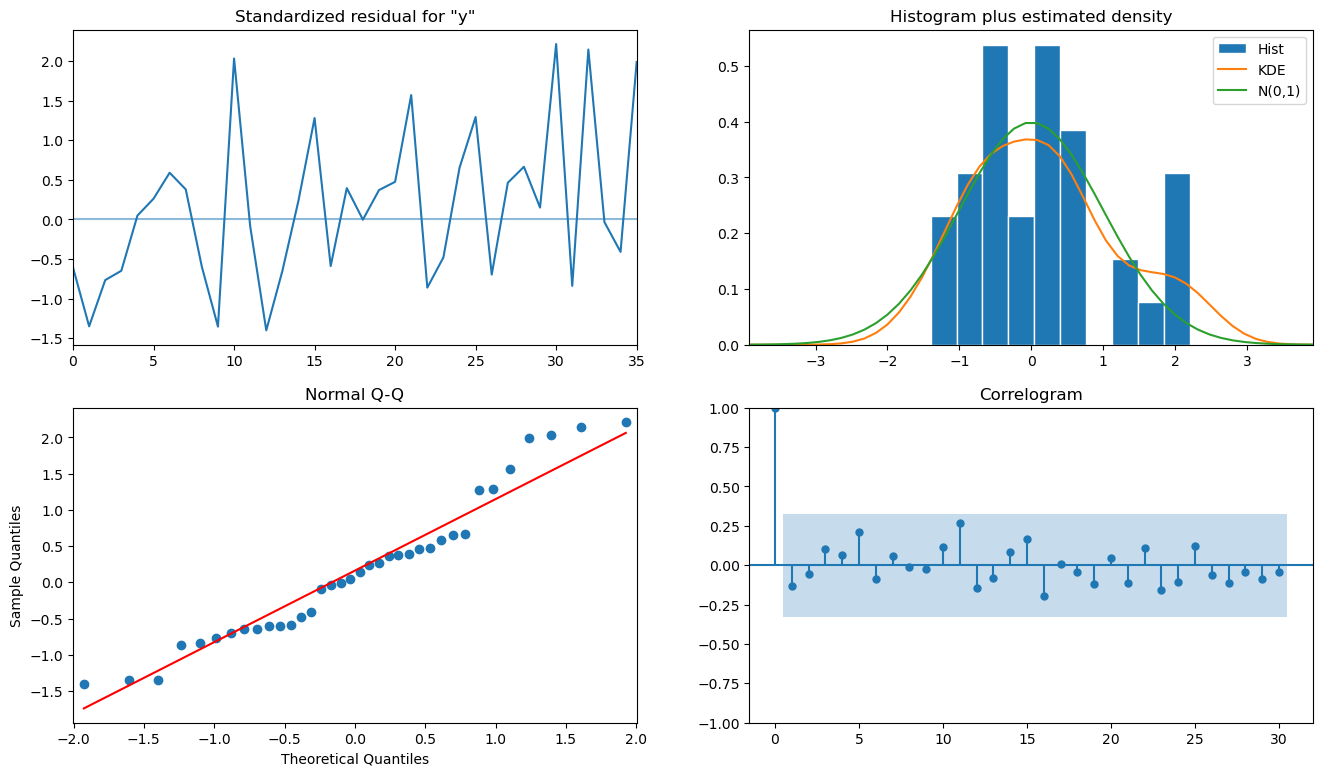

In [10]:
#analisando resíduos do modelo AR2
fig = plt.figure(figsize=(16,9))
fig = AR_2.plot_diagnostics(fig=fig, lags=30)

## Modelo PROPHET

In [11]:
#setup
!pip install pystan==2.19.1.1 prophet
from prophet import Prophet

13:30:29 - cmdstanpy - INFO - Chain [1] start processing
13:30:30 - cmdstanpy - INFO - Chain [1] done processing


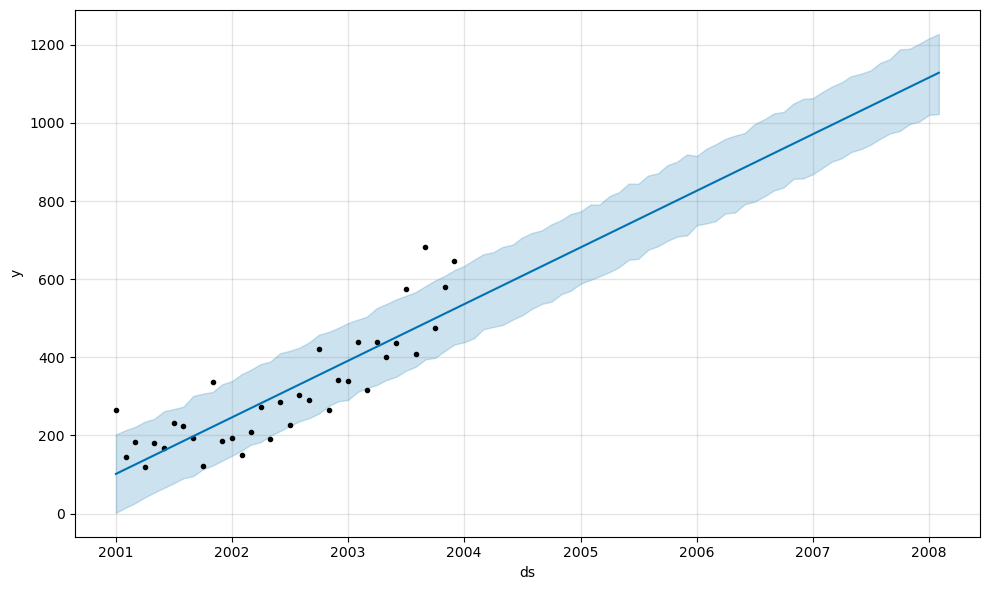

In [12]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model.fit(df)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

In [13]:
model.params

OrderedDict([('lp__', array([[60.8411]])),
             ('k', array([[0.61904]])),
             ('m', array([[0.149083]])),
             ('delta',
              array([[-4.36957e-10, -4.41437e-10,  1.92871e-11, -2.23146e-10,
                       6.45257e-10,  4.99744e-10,  6.70019e-10,  9.62336e-10,
                      -4.10027e-10,  3.37666e-06,  2.09962e-09,  1.36661e-08,
                       7.69833e-06,  8.70685e-06,  1.20008e-09,  6.63018e-05,
                       1.29102e-05,  4.97535e-05,  4.76072e-06,  5.00594e-10,
                       1.42024e-05,  1.05079e-09,  1.01390e-09,  9.67060e-10,
                       1.09293e-10]])),
             ('sigma_obs', array([[0.111587]])),
             ('beta', array([[2.00728e-15]])),
             ('trend',
              array([[0.149083, 0.167119, 0.18341 , 0.201446, 0.2189  , 0.236936,
                      0.25439 , 0.272426, 0.290462, 0.307916, 0.325952, 0.343406,
                      0.361442, 0.379478, 0.395769, 0.413805, 

## Comparando modelos AR e PROPHET com MAE

In [14]:
#setup
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

In [15]:
print(df)

        y         ds
0   266.0 2001-01-01
1   145.9 2001-02-01
2   183.1 2001-03-01
3   119.3 2001-04-01
4   180.3 2001-05-01
5   168.5 2001-06-01
6   231.8 2001-07-01
7   224.5 2001-08-01
8   192.8 2001-09-01
9   122.9 2001-10-01
10  336.5 2001-11-01
11  185.9 2001-12-01
12  194.3 2002-01-01
13  149.5 2002-02-01
14  210.1 2002-03-01
15  273.3 2002-04-01
16  191.4 2002-05-01
17  287.0 2002-06-01
18  226.0 2002-07-01
19  303.6 2002-08-01
20  289.9 2002-09-01
21  421.6 2002-10-01
22  264.5 2002-11-01
23  342.3 2002-12-01
24  339.7 2003-01-01
25  440.4 2003-02-01
26  315.9 2003-03-01
27  439.3 2003-04-01
28  401.3 2003-05-01
29  437.4 2003-06-01
30  575.5 2003-07-01
31  407.6 2003-08-01
32  682.0 2003-09-01
33  475.3 2003-10-01
34  581.3 2003-11-01
35  646.9 2003-12-01


In [16]:
#definindo o conjunto de treino e teste
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [17]:
#modelo AR
model_ar = AutoReg(train.y, lags=1)
model_ar_fit = model_ar.fit()
ar_predictions = model_ar_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [18]:
#modelo Prophet
model_prophet = Prophet()
model_prophet.fit(train)
future = model_prophet.make_future_dataframe(periods=12, freq='M')
prophet_predictions = model_prophet.predict(future)['yhat'].tail(12)

13:30:31 - cmdstanpy - INFO - Chain [1] start processing
13:30:32 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
#comparando os modelos usando a métrica MAE
ar_mae = mean_absolute_error(test.y, ar_predictions)
prophet_mae = mean_absolute_error(test.y, prophet_predictions)

In [20]:
print('AR MAE:', ar_mae)

AR MAE: 246.163275336851


In [21]:
print('Prophet MAE:', prophet_mae)

Prophet MAE: 131.5008536155049


**Comentários sobre a comparação dos modelos AR e PROPHET**

Com base nos resultados obtidos através da métrica MAE (Mean Absolute Error) é possível concluir que o modelo Prophet (131.5008) teve melhor desempenho com relação a AR (246.1632), pois o valor de MAE do modelo obtido pelo Phophet foi menor que o de AR, indicando que houveram menos erros em suas previsões. 

## Previsão um passo à frente com PROPHET

In [22]:
model_prophet = Prophet()
model_prophet.fit(df)

#fazendo previsão com um passo à frente (próximos 12 meses)
future = model_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = model_prophet.predict(future)
#one_step_ahead_forecast = forecast['yhat'].iloc[-1]
forecast_next_12_months = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print(forecast_next_12_months)

13:30:32 - cmdstanpy - INFO - Chain [1] start processing
13:30:33 - cmdstanpy - INFO - Chain [1] done processing


           ds        yhat  yhat_lower  yhat_upper
36 2004-01-01  365.446777  297.843053  441.452323
37 2004-02-01  605.822666  530.583911  683.628216
38 2004-03-01  590.276458  511.999619  659.737933
39 2004-04-01  460.579480  384.923610  533.627388
40 2004-05-01  564.330628  495.162754  641.585191
41 2004-06-01  593.127534  523.217567  670.185380
42 2004-07-01  597.774769  524.641501  671.074200
43 2004-08-01  751.478416  678.338625  824.367878
44 2004-09-01  537.933868  463.366144  611.219260
45 2004-10-01  619.447826  551.134195  692.217780
46 2004-11-01  762.504163  686.534752  835.005049
47 2004-12-01  510.205052  437.289877  591.303972


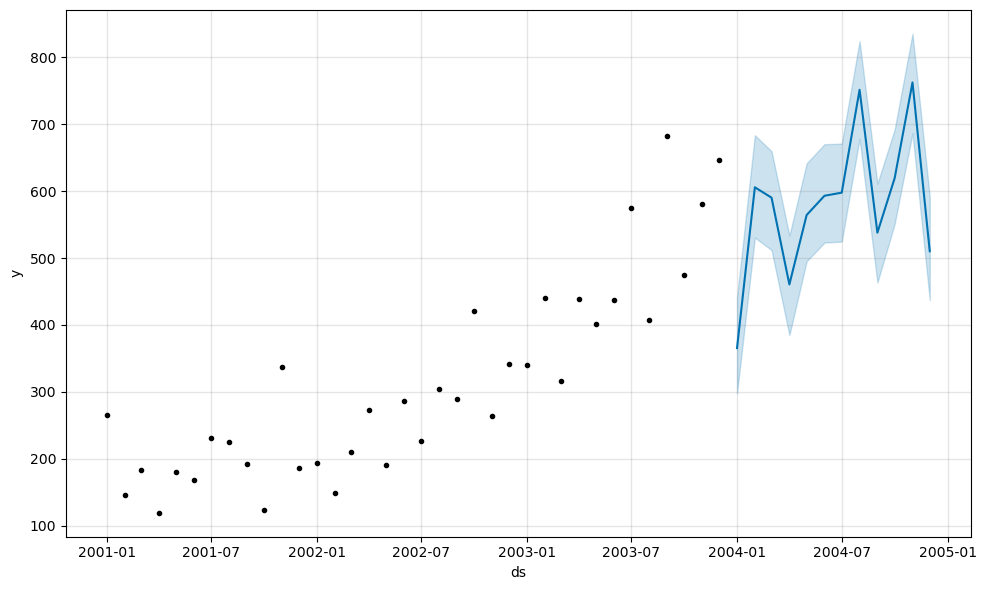

In [23]:
#plotando forecast (próximos 12 meses)
fig1 = model_prophet.plot(forecast.tail(12))

**Conclusão**

A partir dos resultados apresentados é possível concluir que o modelo prevê um aumento nas vendas na maioria dos meses do ano, mostrando queda nas vendas apenas nos meses de setembro e dezembro, se comparados as vendas do ano 3. Além disso, o modelo indica uma margem de incerteza nos resultados, com valores mínimo e máximo previstos (yhat_lower e yhat_upper) que podem ajudar a delimitar um intervalo de confiança para as previsões. 